In [1]:
import numpy as np
import pandas as pd 
import cv2
import os,random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

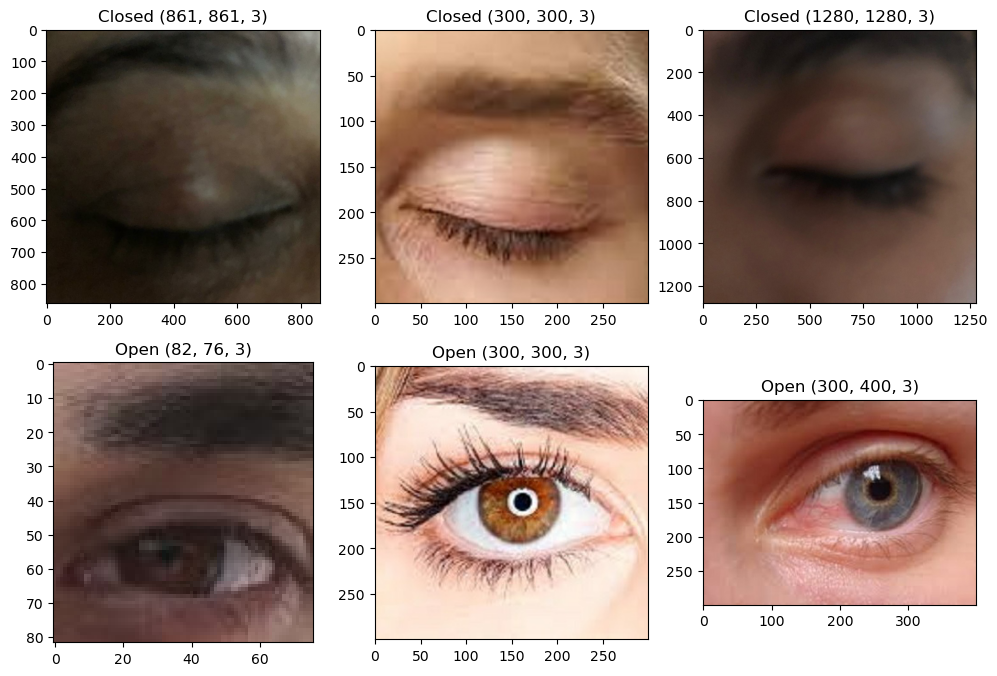

In [2]:
eyes_path = 'Driver_Drowsiness/train'

fig,axes = plt.subplots(2,3,figsize=(12,8))

for ax,dirr in enumerate(['Closed','Open']):
    img_dir = os.path.join(eyes_path,dirr)
    random_imgs = random.sample(os.listdir(img_dir),3)
    for i,img in enumerate(random_imgs):
        img_path = os.path.join(img_dir,img)
        eye = plt.imread(img_path)
        axes[ax,i].imshow(eye)
        axes[ax,i].set_title('{} {}'.format(dirr,eye.shape))

In [2]:
def eyes_data():
    directory = 'Driver_Drowsiness/train'
    labels = ['Closed','Open']
    eye_arr = []
    for clss,label in enumerate(labels):
        classs = clss
        img_dir = os.path.join(directory,label)
        for img in os.listdir(img_dir):
            img_path = os.path.join(img_dir,img)
            img_array = cv2.imread(img_path)      # reading every image from both the directory
            resized_array = cv2.resize(img_array, (150, 150))  # resizing each image to (150,150)
            eye_arr.append([resized_array, classs])
    return eye_arr

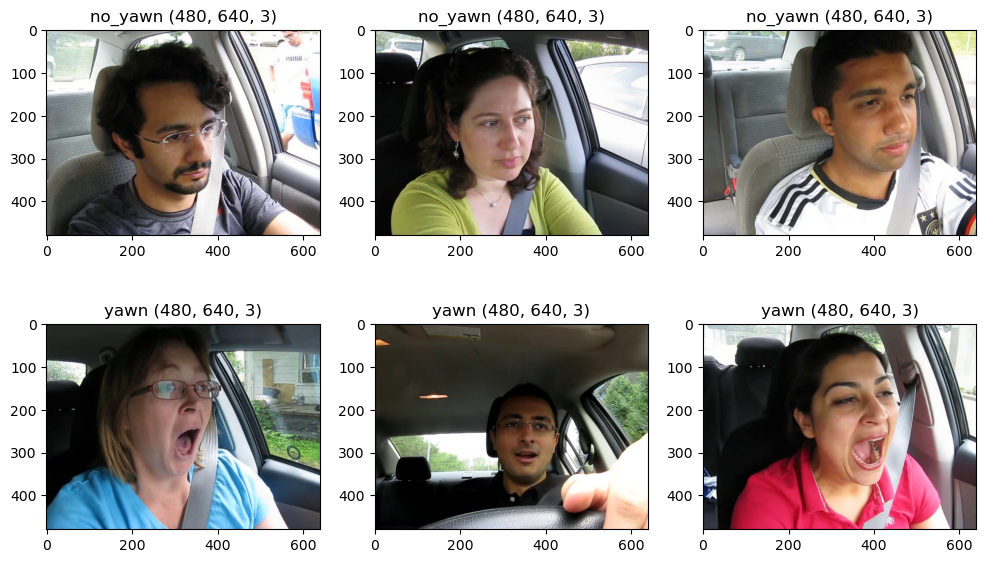

In [4]:
dir_path = 'Driver_Drowsiness/train'

fig,axes = plt.subplots(2,3,figsize=(12,7))

for ax,dirr in enumerate(['no_yawn','yawn']):
    img_dir = os.path.join(dir_path,dirr)
    random_imgs = random.sample(os.listdir(img_dir),3)
    for i,img in enumerate(random_imgs):
        img_path = os.path.join(img_dir,img)
        eye = plt.imread(img_path)
        axes[ax,i].imshow(eye)
        axes[ax,i].set_title('{} {}'.format(dirr,eye.shape))
 

In [3]:
def yawnn():
    directory = 'Driver_Drowsiness/train'
    labels = ['no_yawn','yawn']
    yawn_no_yawn = []
    for clss,label in enumerate(labels):
        classs = clss+2
        img_dir = os.path.join(directory,label)
        for img in os.listdir(img_dir):
            img_path = os.path.join(img_dir,img)
            image_array = cv2.imread(img_path)

            face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
            face = face_classifier.detectMultiScale(image_array, scaleFactor=1.3, minNeighbors=5) # detecting face from the image
            for (x, y, w, h) in face:
                image = cv2.rectangle(image_array, (x, y), (x + w, y + h), (0, 255, 0), 2)
                face_img = image[y:y+h, x:x+w]
                resized_array = cv2.resize(face_img,(150,150))  # resizing the image to (150,150)
                yawn_no_yawn.append([resized_array,classs])  # we are using only those image where we detected face
    return yawn_no_yawn

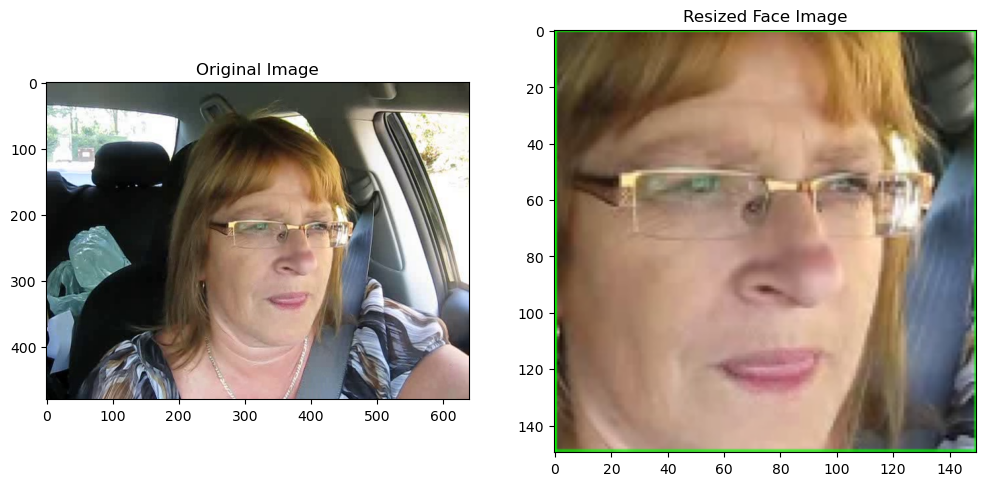

In [6]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
axs = axes.ravel()

img_path = 'Driver_Drowsiness/train/no_yawn/1063.jpg'

img_arr = cv2.imread(img_path)
rgb_img = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
axs[0].imshow(rgb_img)
axs[0].set_title('Original Image')

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
face = face_classifier.detectMultiScale(img_arr, scaleFactor=1.3, minNeighbors=5)
for (x, y, w, h) in face:
    img = cv2.rectangle(img_arr, (x, y), (x + w, y + h), (0, 255, 0), 2)
roi_color = img[y:y+h, x:x+w]
resized_array = cv2.resize(roi_color, (150, 150))
rgb_img = cv2.cvtColor(resized_array,cv2.COLOR_BGR2RGB)
axs[1].imshow(rgb_img)
axs[1].set_title('Resized Face Image')

plt.show()

In [7]:
arr1 = eyes_data()
arr2 = yawnn()

In [8]:
arr1.extend(arr2)
len(arr1)

1925

In [9]:
X = []
y = []
for feature, label in arr1:
    X.append(feature)
    y.append(label)

In [10]:
pp = np.array(y)
Y = ks.utils.to_categorical(pp,num_classes=4)

In [11]:
X = np.array(X)
X.shape

(1925, 150, 150, 3)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape 

((1540, 150, 150, 3), (385, 150, 150, 3), (1540, 4), (385, 4))

In [13]:
train_generator = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_generator.flow(x_train, y_train, shuffle=True)
test_generator = test_generator.flow(x_test, y_test, shuffle=False)

In [14]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
model.summary()

C:\Users\kanak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 613,956 (2.34 MB)

 Trainable params: 613,956 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50


C:\Users\kanak\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 405s 8s/step - accuracy: 0.4533 - loss: 1.2473 - val_accuracy: 0.7584 - val_loss: 0.6255
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.7973 - loss: 0.4974 - val_accuracy: 0.8130 - val_loss: 0.4895
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.8219 - loss: 0.4460 - val_accuracy: 0.8260 - val_loss: 0.3576
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.8535 - loss: 0.3215 - val_accuracy: 0.8701 - val_loss: 0.3604
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8593 - loss: 0.3184 - val_accuracy: 0.8857 - val_loss: 0.2970
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.8785 - loss: 0.2988 - val_accuracy: 0.8675 - val_loss: 0.2569
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.8989 - loss: 0.2462 - val_accuracy: 0.8675 - val_loss: 0.2591
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8904 - loss: 0.2474 - val_accuracy: 0.8935 - val_loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1


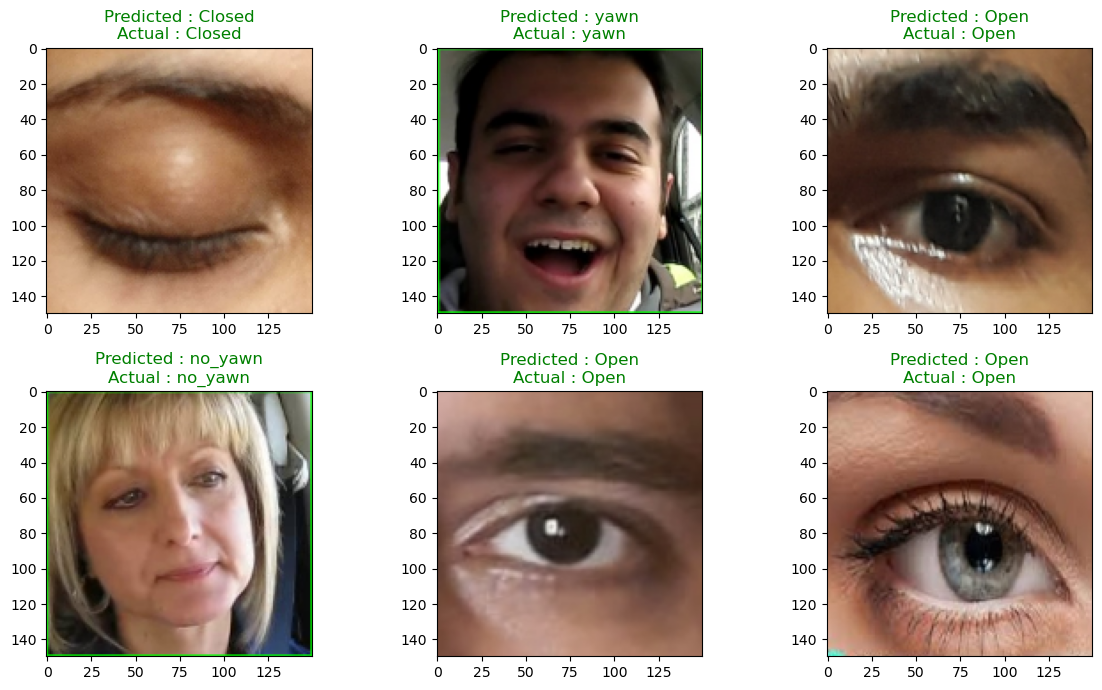

In [22]:
##### labels = ['Closed','Open','no_yawn','yawn']

random_num = random.sample(range(x_train.shape[0]),6)
fig,axes = plt.subplots(2,3,figsize=(12,7))
axs = axes.ravel()
labels = ['Closed','Open','no_yawn','yawn']
for i,num in enumerate(random_num):
    img_arr = x_train[num]
    actual_class = np.argmax(y_train[num],axis=0)
    img = img_arr.reshape((1,) + img_arr.shape)
    pred_arr = model.predict(img)
    prediction = np.argmax(pred_arr,axis=1)[0]
    rgb_img = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
    axs[i].imshow(rgb_img)
    if actual_class == prediction:
        col = 'green'
    else:
        col = 'red'
    print(prediction)
    axs[i].set_title('Predicted : {}\nActual : {}'.format(labels[prediction],labels[actual_class]),{'color':col})
plt.tight_layout()
plt.show()        

In [24]:
model.save('driver_drowsiness.h5')